Install

In [1]:
pip install tensorflow matplotlib scikit-learn seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Import Libraries

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


Directories and Image Parameter

In [4]:
train_data_dir = 'output_dataset/train'
validation_data_dir = 'output_dataset/val'
test_data_dir = 'output_dataset/test'
img_width, img_height = 40, 40
batch_size = 16


Data Generators

In [5]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)


Prepare Data

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 41513 images belonging to 48 classes.
Found 41513 images belonging to 48 classes.
Found 41513 images belonging to 48 classes.


Define Model

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])


Compile

In [9]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)


Checkpoint

In [10]:
checkpoint = ModelCheckpoint('mangyanscript_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')


Train

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=15,
    callbacks=[checkpoint]
)


Epoch 1/15


C:\Users\kenma\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2594/2594 ━━━━━━━━━━━━━━━━━━━━ 176s 67ms/step - accuracy: 0.2035 - loss: 2.9682 - val_accuracy: 0.7433 - val_loss: 0.7751
Epoch 2/15
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 0s 31us/step - accuracy: 0.7500 - loss: 0.7358 - val_accuracy: 0.6667 - val_loss: 0.8854
Epoch 3/15
   1/2594 ━━━━━━━━━━━━━━━━━━━━ 3:33 82ms/step - accuracy: 0.7500 - loss: 0.5724

c:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


2594/2594 ━━━━━━━━━━━━━━━━━━━━ 77s 30ms/step - accuracy: 0.7801 - loss: 0.6616 - val_accuracy: 0.8272 - val_loss: 0.4840
Epoch 4/15
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 0s 33us/step - accuracy: 0.9375 - loss: 0.2082 - val_accuracy: 0.8889 - val_loss: 0.5271
Epoch 5/15
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 54s 21ms/step - accuracy: 0.8594 - loss: 0.4108 - val_accuracy: 0.8628 - val_loss: 0.3959
Epoch 6/15
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step - accuracy: 0.7500 - loss: 0.6818 - val_accuracy: 0.7778 - val_loss: 0.5430
Epoch 7/15
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 54s 21ms/step - accuracy: 0.8928 - loss: 0.3116 - val_accuracy: 0.8975 - val_loss: 0.2897
Epoch 8/15
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step - accuracy: 0.8750 - loss: 0.4164 - val_accuracy: 0.8889 - val_loss: 0.1774
Epoch 9/15
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 51s 19ms/step - accuracy: 0.9159 - loss: 0.2437 - val_accuracy: 0.9346 - val_loss: 0.1855
Epoch 10/15
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.9375 - loss: 0.0833 -

Save Model

In [12]:
model.save('mangyanscript_model.keras')


Evaluate

In [13]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


2595/2595 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9671 - loss: 0.0975
Test accuracy: 0.9619877934455872


Plot Training and Validation Accuracy

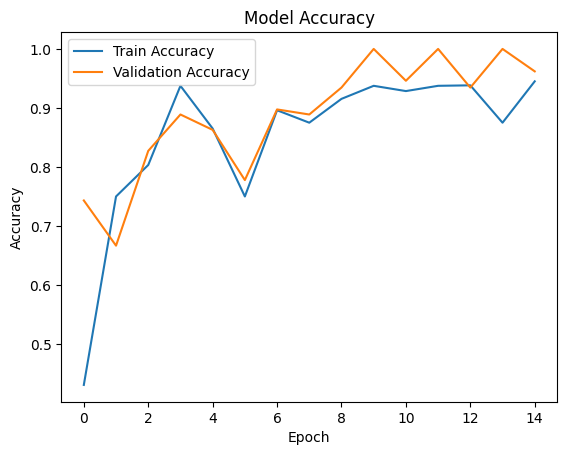

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


Plot Training and Validation Loss

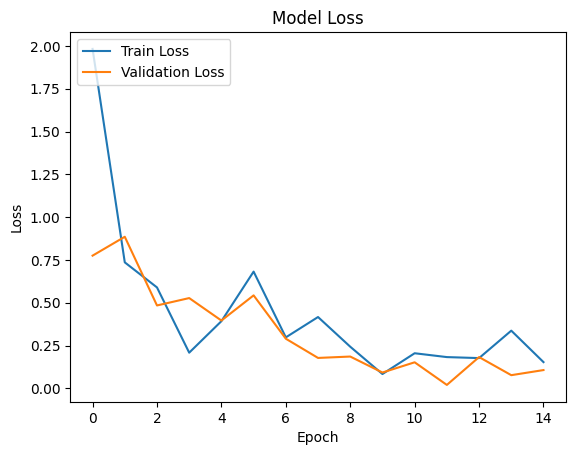

In [15]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


Visuals

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


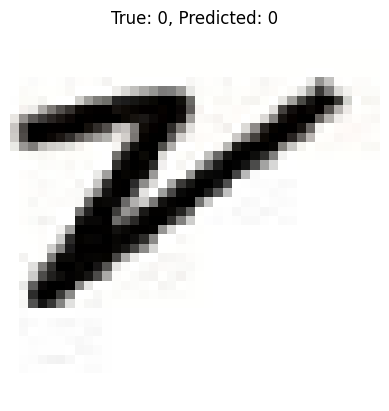

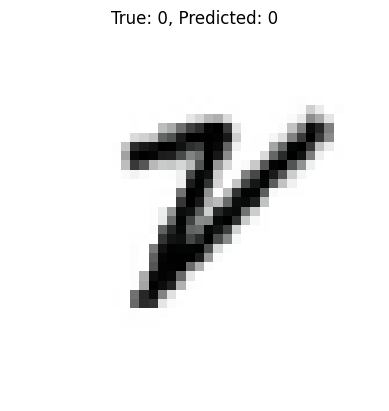

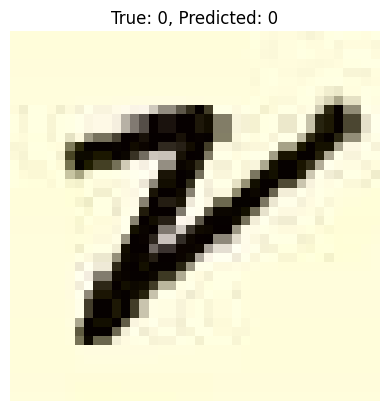

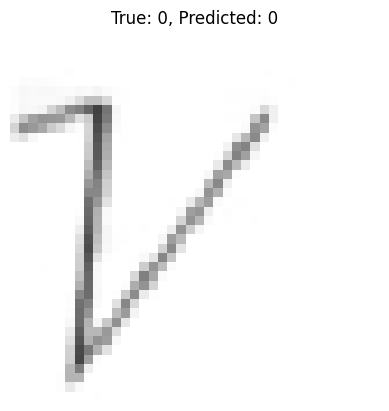

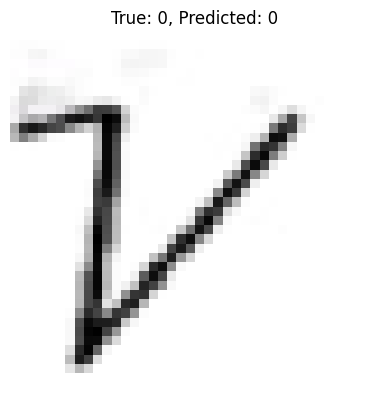

In [16]:
x_test, y_test = next(test_generator)

# Make predictions
predictions = model.predict(x_test)

# Plot the images along with the predicted and true labels
for i in range(5):  # Display 5 images
    plt.imshow(x_test[i])
    true_label = np.argmax(y_test[i])
    predicted_label = np.argmax(predictions[i])
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


Confusion Matrix

2595/2595 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step


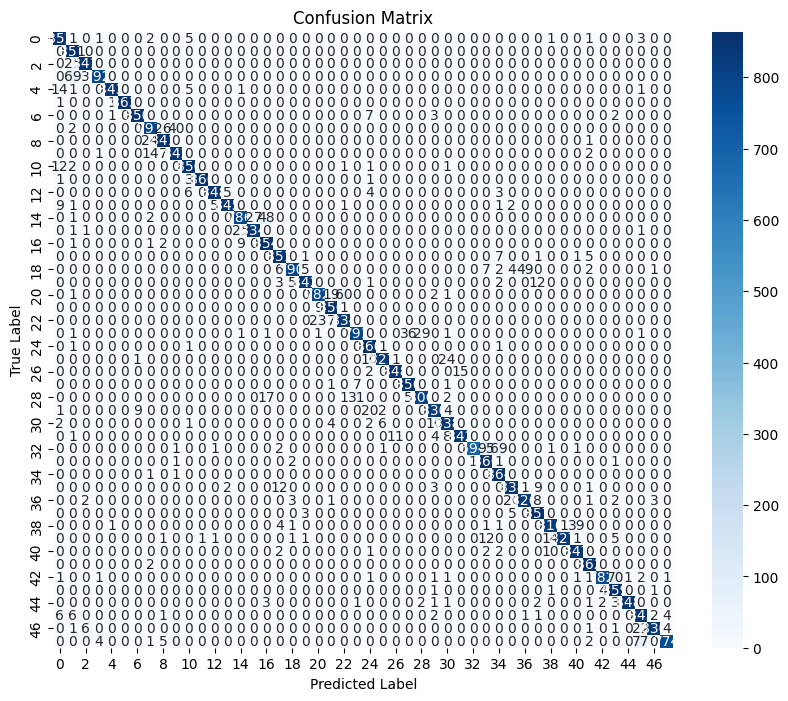

In [17]:
# Cell 14: Confusion Matrix
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
